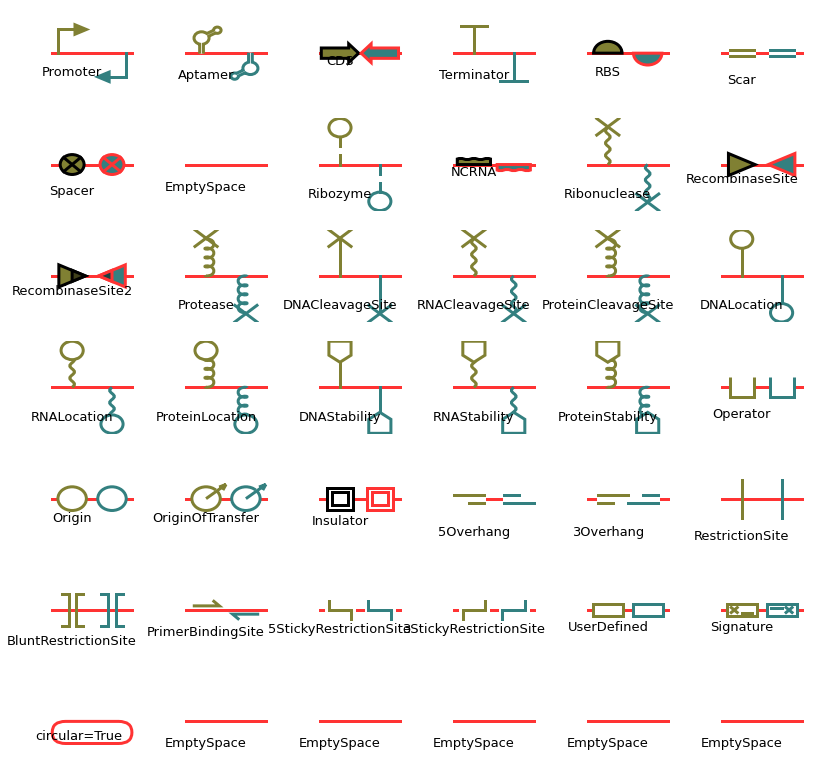

In [1]:
#import sys
import dnaplotlib as dpl
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
dnaline = 3
edgecolor = (1,.2,.2)

dr = dpl.DNARenderer(scale = 5,linewidth=dnaline,linecolor=edgecolor)
part_renderers = dr.SBOL_part_renderers()
parts = list(part_renderers.keys())+[['EmptySpace','circular test']]+['EmptySpace']*5
dontrender = ['StemTop']
fig1 = plt.figure(figsize=(14,14))
faxes = fig1.subplots(ncols=6,nrows=7)
raxes = np.ravel(faxes)
#print(raxes)
raxind = 0





for part in parts:
    if(part in dontrender):
        continue
    if(type(part)==list):
        circMake = True
        part = part[0]
        partlabel = "circular=True"
    else:
        circMake = False
        partlabel=part
    ax = raxes[raxind]
    raxind+=1
    #plt.Figure(figsize=(.1,.1))
    #ax = plt.gca()
    design = [{'type':part, 'name':'test', 'fwd':True,\
               'opts':{'label':partlabel,'label_size':13,'label_y_offset':-8,'color':(.5,.5,.2)}},
             {'type':part, 'name':'testr', 'fwd':False,'opts':{'color':(.2,.5,.5),'edgecolor':edgecolor}}]
    start,end = dr.renderDNA(ax,design,part_renderers,circular=circMake)
    ax.axis('off')
    xdist = end-start
    delta = xdist*.2
    start-=delta
    end+=delta
    newxdist = end-start
    ax.set_xlim([start,end])
    ax.set_ylim([-newxdist/len(design),newxdist/len(design)])
plt.show()

0


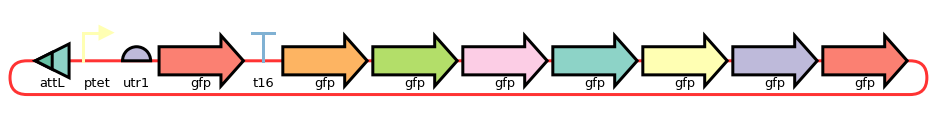

In [1]:
import dnaplotlib as dpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from collections import OrderedDict
%matplotlib inline

cmap = plt.get_cmap('Set3')

dnaline = 3
edgecolor = (1,.2,.2)

dr = dpl.DNARenderer(scale = 5,linewidth=dnaline,linecolor=edgecolor)


class SimplePart:
    def __init__(self,name,dpl_type,direction='forward',bound=False,added_opts=None):
        self.name = name
        self.dpl_type = dpl_type
        self.direction=direction
        self.bound = bound
        self.added_opts = added_opts







prom = SimplePart('ptet','Promoter')
utr = SimplePart('utr1','RBS')
cds = SimplePart('gfp','CDS')
term = SimplePart('t16','Terminator')
aB = SimplePart('attB','RecombinaseSite')
aL = SimplePart('attL','RecombinaseSite2',direction="reverse")
ori = SimplePart('','Origin',added_opts={'face_color':(0.5,0.5,.2)})


simple_arc = {'Binding':[[1,"RNAP"],[2,"A"],[2,"B"],[7,"Bxb1"],[5,"Bxb1"]]}

a = simple_plot_design([aL,prom,utr,cds,term,cds,cds,cds,cds,cds,cds,cds],simplereg = {},circular=True)

